## Transfer Learning  VGG16 using Keras

## Plant Disease Detection

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/vishalb/Desktop/ML project/Dataset/train'
valid_path = 'C:/Users/vishalb/Desktop/ML project/Dataset/valid'


In [4]:
inception = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/vishalb/Desktop/ML project/Dataset/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('C:/Users/vishalb/Desktop/ML project/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18341 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/vishalb/Desktop/ML project/Dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 574 steps, validate for 144 steps
Epoch 1/10
574/574 [==============================] - 239s 417ms/step - loss: 0.7290 - accuracy: 0.7577 - val_loss: 0.5262 - val_accuracy: 0.8277
Epoch 2/10
574/574 [==============================] - 246s 429ms/step - loss: 0.4040 - accuracy: 0.8625 - val_loss: 0.5226 - val_accuracy: 0.8301
Epoch 3/10
574/574 [==============================] - 243s 424ms/step - loss: 0.3474 - accuracy: 0.8829 - val_loss: 0.4298 - val_accuracy: 0.8600
Epoch 4/10
574/574 [==============================] - 249s 433ms/step - loss: 0.2988 - accuracy: 0.9023 - val_loss: 0.3821 - val_accuracy: 0.8794
Epoch 5/10
574/574 [==============================] - 237s 413ms/step - loss: 0.2758 - accuracy: 0.9093 - val_loss: 0.6688 - val_accuracy: 0.8170
Epoch 6/10
574/574 [==============================] - 235s 409ms/step - loss: 0.2435 - accuracy: 0.9

In [16]:
import matplotlib.pyplot as plt

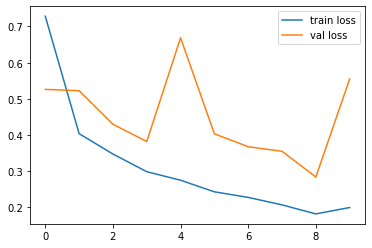

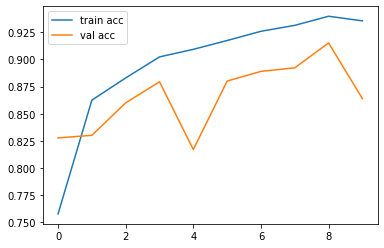

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal1_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal1_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('model1_vgg16.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[4.32440310e-16, 3.60957650e-03, 5.79077728e-08, ...,
        8.03512201e-10, 1.47599712e-06, 3.80231972e-06],
       [5.40363532e-10, 2.88495158e-07, 2.70628311e-06, ...,
        3.82380620e-07, 9.87600088e-01, 8.03653671e-11],
       [1.54867093e-21, 5.44275247e-09, 8.30143896e-13, ...,
        1.14692988e-14, 8.60642881e-18, 9.99987960e-01],
       ...,
       [3.65322701e-14, 3.06276217e-13, 4.17170682e-12, ...,
        1.00000000e+00, 4.65704649e-19, 1.26191137e-23],
       [5.73797251e-19, 6.20989149e-10, 1.37984285e-11, ...,
        3.93088890e-15, 1.95300228e-16, 9.98840630e-01],
       [4.44724188e-11, 2.59144581e-08, 6.69544679e-05, ...,
        2.26694707e-09, 1.02790969e-03, 2.02895731e-16]], dtype=float32)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([1, 8, 1, ..., 8, 1, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model1_vgg16.h5')

In [22]:
#img_data

In [23]:
img=image.load_img(r'C:\Users\vishalb\Desktop\ML project\Dataset\valid\Tomato___Late_blight\00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late.B 4982_flipLR.JPG',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[189., 180., 185.],
        [184., 175., 180.],
        [183., 172., 176.],
        ...,
        [152., 133., 127.],
        [159., 140., 134.],
        [168., 149., 143.]],

       [[186., 177., 182.],
        [183., 174., 179.],
        [185., 174., 178.],
        ...,
        [150., 131., 125.],
        [153., 134., 128.],
        [159., 140., 134.]],

       [[182., 173., 178.],
        [181., 172., 177.],
        [184., 173., 177.],
        ...,
        [151., 132., 126.],
        [151., 132., 126.],
        [154., 135., 129.]],

       ...,

       [[182., 166., 166.],
        [188., 172., 172.],
        [187., 171., 171.],
        ...,
        [147., 128., 122.],
        [149., 130., 124.],
        [153., 134., 128.]],

       [[185., 169., 169.],
        [182., 166., 166.],
        [187., 171., 171.],
        ...,
        [146., 127., 121.],
        [149., 130., 124.],
        [154., 135., 129.]],

       [[191., 175., 175.],
        [180., 164., 164.],
        [187., 1

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[6.67889301e-13, 1.09164134e-32, 1.82478897e-18, 6.36572324e-08,
        9.99960661e-01, 2.13206289e-23, 4.25145386e-14, 1.12082821e-26,
        3.92235270e-05, 1.00925593e-26]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([False])

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.1.0'